<a href="https://colab.research.google.com/github/nagase-systemi/face_recognition-sample/blob/main/demo_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

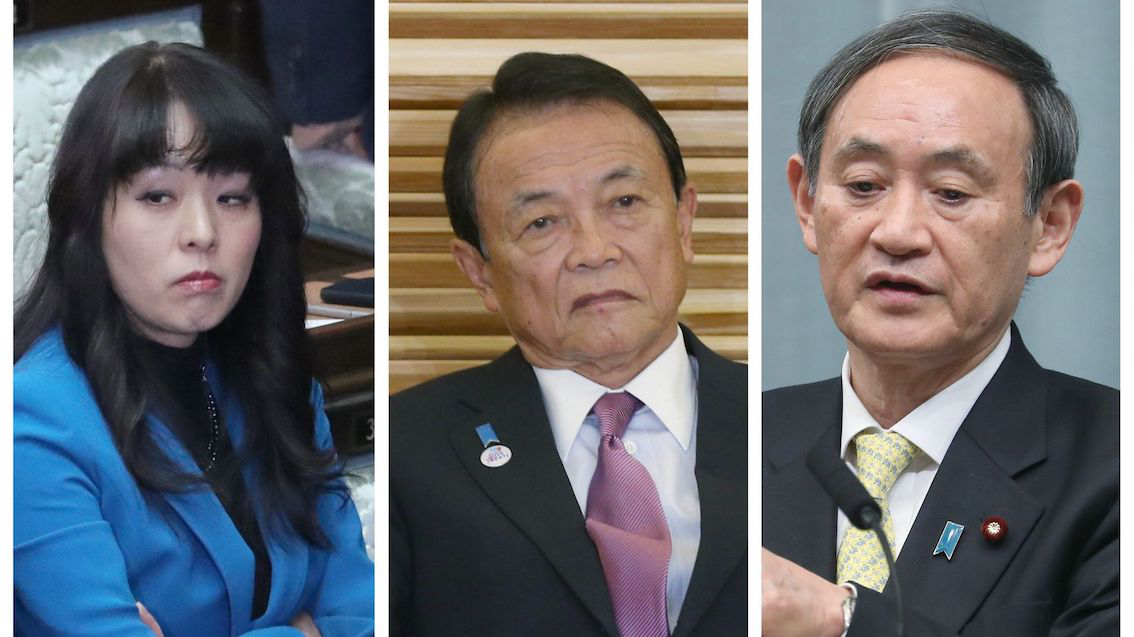

In [10]:
from PIL import Image, ImageDraw
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open('./sample_data/img/japan-3.jpg')
display(pil_im)

In [3]:
!pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=460566da6eba62199fb26bb636c726f7ac121da6190c208a8575cf7c747e1b1e
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


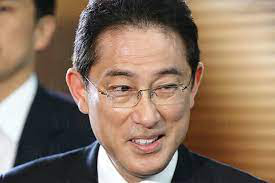

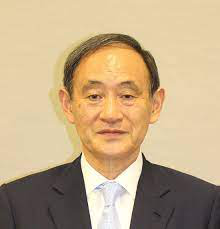

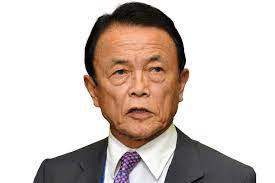

Learned encoding for 3 images.


In [11]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
kishida_image = face_recognition.load_image_file("./sample_data/img/kishida.jpg")
kishida_face_encoding = face_recognition.face_encodings(kishida_image)[0]
pil_im = Image.open('./sample_data/img/kishida.jpg')
display(pil_im)

# Load a second sample picture and learn how to recognize it.
suga_image = face_recognition.load_image_file("./sample_data/img/suga.jpg")
suga_face_encoding = face_recognition.face_encodings(suga_image)[0]
pil_im = Image.open('./sample_data/img/suga.jpg')
display(pil_im)

# Load a third sample picture and learn how to recognize it.
asou_image = face_recognition.load_image_file("./sample_data/img/asou.jpg")
asou_face_encoding = face_recognition.face_encodings(asou_image)[0]
pil_im = Image.open('./sample_data/img/asou.jpg')
display(pil_im)

# Create arrays of known face encodings and their names
known_jp_face_encodings = [
    kishida_face_encoding,
    suga_face_encoding,
    asou_face_encoding
]
known_jp_face_names = [
    "Kishida",
    "Suga",
    "Asou"
]
print('Learned encoding for', len(known_jp_face_encodings), 'images.')

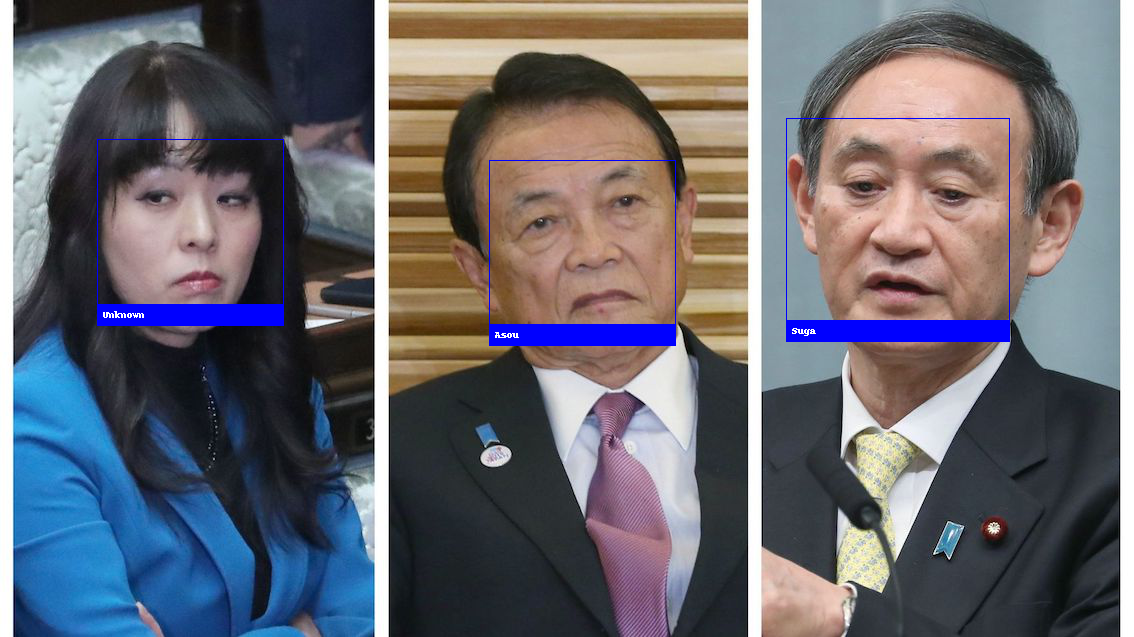

In [7]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("./sample_data/img/japan-3.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_jp_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_jp_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_jp_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)